<a href="https://colab.research.google.com/github/linainsaf/RESNET50_PNEUMONIA_DETECTION/blob/main/ResNet_VGG16_Inception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import libraries

In [ ]:
import random

import numpy as np
import pickle, gzip
import seaborn as sns
np.random.seed(123) # for reproducibility

import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers 
from tensorflow.keras import Model 
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report,confusion_matrix

## Function to plot the accuracy and loss curves of our models 

In [ ]:
def affiche(history):
 # summarize history for accuracy
 plt.plot(history.history['acc'])
 plt.plot(history.history['val_acc'])
 plt.title('model accuracy')
 plt.ylabel('accuracy')
 plt.xlabel('epoch')
 plt.legend(['train', 'test'], loc='upper left')
 plt.show()
 # summarize history for loss
 plt.plot(history.history['loss'])
 plt.plot(history.history['val_loss'])
 plt.title('model loss')
 plt.ylabel('loss')
 plt.xlabel('epoch')
 plt.legend(['train', 'test'], loc='upper left')
 plt.show()

##Import Data:

In [ ]:
with gzip.open(('drive/MyDrive/chest_xray/pneumonia2.pkl.gz'), "rb") as file:
  [X_train,Y_train,X_test,Y_test] = pickle.load(file)

## Data Augmentation

In [ ]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)


In [ ]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow(X_train,Y_train, batch_size = 20)



# Model Building 

## VGG16

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape = (224, 224, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(2, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001), loss = 'binary_crossentropy',metrics = ['acc'])

In [ ]:
vgghist = model.fit(train_generator, validation_data = (X_test,Y_test), steps_per_epoch = 250, epochs = 10)


Epoch 1/10
250/250 [==============================] - 95s 381ms/step - loss: 1.3760 - acc: 0.8859 - val_loss: 0.9942 - val_acc: 0.8606
Epoch 2/10
250/250 [==============================] - 80s 320ms/step - loss: 0.5171 - acc: 0.9179 - val_loss: 0.7554 - val_acc: 0.8830
Epoch 3/10
250/250 [==============================] - 80s 320ms/step - loss: 0.4024 - acc: 0.9239 - val_loss: 0.5302 - val_acc: 0.9071
Epoch 4/10
250/250 [==============================] - 80s 318ms/step - loss: 0.3647 - acc: 0.9291 - val_loss: 0.4922 - val_acc: 0.9167
Epoch 5/10
250/250 [==============================] - 80s 319ms/step - loss: 0.3522 - acc: 0.9343 - val_loss: 0.4959 - val_acc: 0.9183
Epoch 6/10
250/250 [==============================] - 80s 320ms/step - loss: 0.3617 - acc: 0.9337 - val_loss: 0.6533 - val_acc: 0.8910
Epoch 7/10
250/250 [==============================] - 80s 319ms/step - loss: 0.3237 - acc: 0.9406 - val_loss: 1.0183 - val_acc: 0.8718
Epoch 8/10
250/250 [==============================] - 8

###Evaluation of VGG model

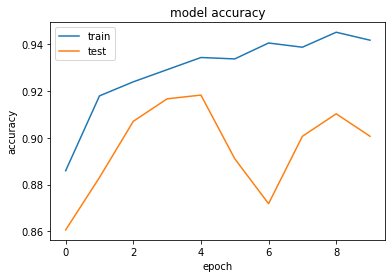

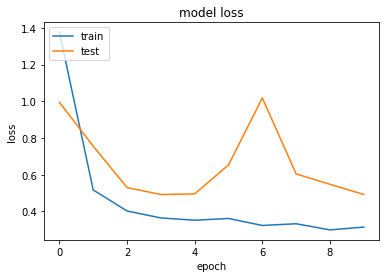

In [ ]:
affiche(vgghist) #donnee en annexe

In [ ]:
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
Y_truth=np.argmax(Y_test, axis=1)

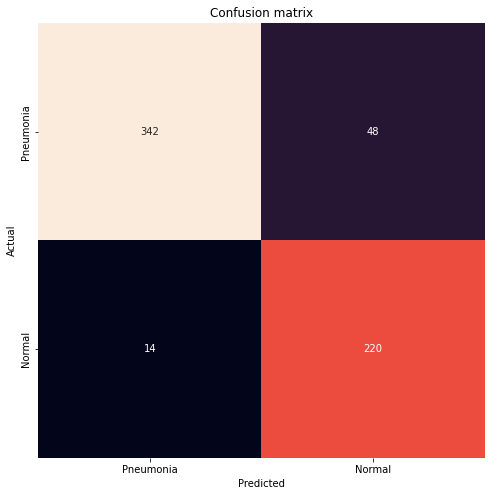

In [ ]:
classnames = ['Pneumonia', 'Normal']
plt.figure(figsize=(8,8))
plt.title('Confusion matrix')
sns.heatmap(confusion_matrix(Y_truth, predicted_classes), cbar=False, xticklabels=classnames, yticklabels=classnames, fmt='d', annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
print(classification_report(Y_truth, predicted_classes))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       390
           1       0.82      0.94      0.88       234

    accuracy                           0.90       624
   macro avg       0.89      0.91      0.90       624
weighted avg       0.91      0.90      0.90       624



## Inception V3

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
base_model = InceptionV3(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
from tensorflow.keras.optimizers import RMSprop

x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(2, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = RMSprop(learning_rate=0.0001), loss = 'binary_crossentropy', metrics = ['acc'])

In [ ]:
inception = model.fit(train_generator, validation_data = (X_test,Y_test), steps_per_epoch = 250, epochs = 10)


Epoch 1/10
250/250 [==============================] - 84s 308ms/step - loss: 11.4094 - acc: 0.7884 - val_loss: 0.8607 - val_acc: 0.8317
Epoch 2/10
250/250 [==============================] - 73s 293ms/step - loss: 0.6715 - acc: 0.8173 - val_loss: 0.5261 - val_acc: 0.8590
Epoch 3/10
250/250 [==============================] - 73s 292ms/step - loss: 0.5133 - acc: 0.8263 - val_loss: 0.5157 - val_acc: 0.8173
Epoch 4/10
250/250 [==============================] - 74s 295ms/step - loss: 0.4638 - acc: 0.8367 - val_loss: 0.3579 - val_acc: 0.8574
Epoch 5/10
250/250 [==============================] - 72s 288ms/step - loss: 0.4259 - acc: 0.8449 - val_loss: 0.6240 - val_acc: 0.7516
Epoch 6/10
250/250 [==============================] - 72s 289ms/step - loss: 0.4008 - acc: 0.8483 - val_loss: 0.5728 - val_acc: 0.7580
Epoch 7/10
250/250 [==============================] - 72s 289ms/step - loss: 0.3510 - acc: 0.8625 - val_loss: 0.3911 - val_acc: 0.8462
Epoch 8/10
250/250 [==============================] - 

###Evaluation of Inception model

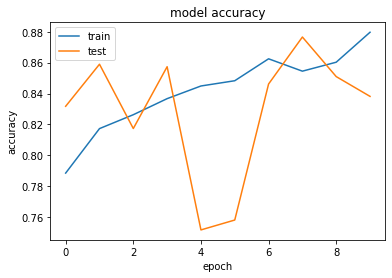

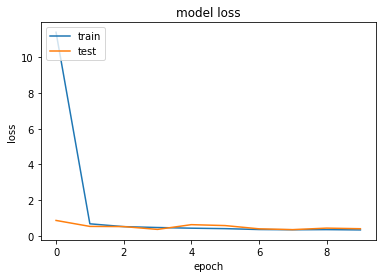

In [ ]:
affiche(inception) #donnee en annexe

In [ ]:
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
Y_truth=np.argmax(Y_test, axis=1)

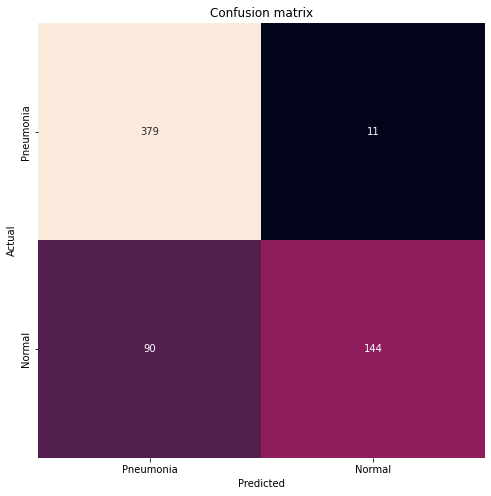

In [ ]:
classnames = ['Pneumonia', 'Normal']
plt.figure(figsize=(8,8))
plt.title('Confusion matrix')
sns.heatmap(confusion_matrix(Y_truth, predicted_classes), cbar=False, xticklabels=classnames, yticklabels=classnames, fmt='d', annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
print(classification_report(Y_truth, predicted_classes))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       390
           1       0.86      0.78      0.82       234

    accuracy                           0.87       624
   macro avg       0.87      0.85      0.86       624
weighted avg       0.87      0.87      0.87       624



## ResNet50

In [ ]:
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(input_shape=(224, 224,3), include_top=False, weights="imagenet")

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D

# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(2, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.00001), loss = 'binary_crossentropy',metrics = ['acc'])

In [ ]:
resnet_history = model.fit(train_generator, validation_data = (X_test,Y_test), steps_per_epoch = 250, epochs = 5)


Epoch 1/5
250/250 [==============================] - 82s 313ms/step - loss: 0.3210 - acc: 0.9009 - val_loss: 0.3867 - val_acc: 0.8670
Epoch 2/5
250/250 [==============================] - 77s 309ms/step - loss: 0.2210 - acc: 0.9293 - val_loss: 0.2537 - val_acc: 0.9119
Epoch 3/5
250/250 [==============================] - 77s 306ms/step - loss: 0.1784 - acc: 0.9404 - val_loss: 0.3979 - val_acc: 0.8894
Epoch 4/5
250/250 [==============================] - 77s 306ms/step - loss: 0.1773 - acc: 0.9430 - val_loss: 0.2858 - val_acc: 0.9054
Epoch 5/5
250/250 [==============================] - 76s 305ms/step - loss: 0.1710 - acc: 0.9488 - val_loss: 0.2868 - val_acc: 0.9054


###Evaluation of ResNet 50 model

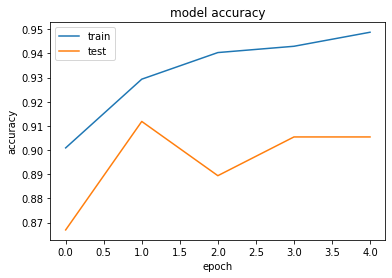

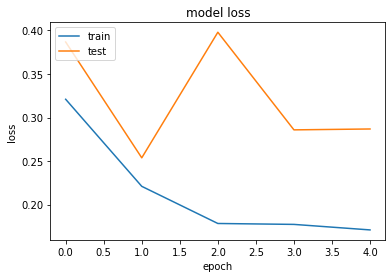

In [ ]:
affiche(resnet_history) #donnee en annexe

In [ ]:
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
Y_truth=np.argmax(Y_test, axis=1)

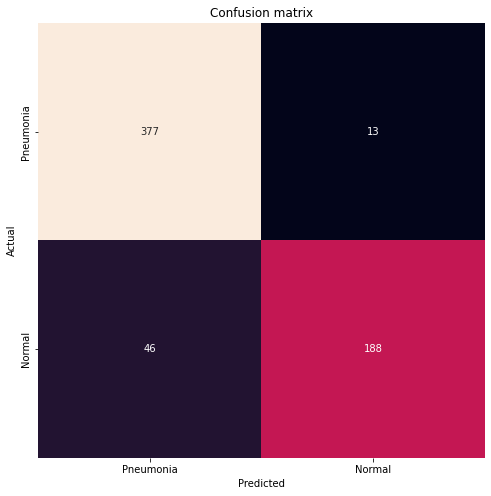

In [ ]:
classnames = ['Pneumonia', 'Normal']
plt.figure(figsize=(8,8))
plt.title('Confusion matrix')
sns.heatmap(confusion_matrix(Y_truth, predicted_classes), cbar=False, xticklabels=classnames, yticklabels=classnames, fmt='d', annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
print(classification_report(Y_truth, predicted_classes))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       390
           1       0.94      0.80      0.86       234

    accuracy                           0.90       624
   macro avg       0.91      0.88      0.89       624
weighted avg       0.91      0.90      0.90       624

